# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Three observable trends: 
1.	In the northern hemisphere as latitude decreases temperature increases. Meaning the closer to the north the more the temperature drops to closer to 0 degrees Fahrenheit. A similar trend is observable in the southern hemisphere the closer the latitude is to the south pole (ie closer to -50 degrees latitude) the more the temperature drops. This corroborates the known fact that hotter temperatures are closer to the equator which has the most direct sunlight. 
2.	There is a weak relationship between Latitude and humidity. Both the Southern and Northern hemispheres had weaker relationships observed by their linear regressions. The relationship is observable. However, the relationship between latitude and humidity for both hemispheres is not clearly defined by the linear regression. 
3.	For both hemispheres, there is no relationship between cloudiness and latitude. There is no observable relationship between the two. 


In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress
from pprint import pprint 
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Save config information. for building the website to pull APIs 
url = "https://api.openweathermap.org/data/2.5/weather?q="
units = "Imperial"

In [7]:
print("Beginning Data Retrieval\n--------------------------")
# Create List to append data into 
citydata=[]

#to create counters of sets 
counter=0 
counter2=1

#Start a loop openweather map so I can create a dataframe 
for city in cities: 
    #start with building URL and telling what to get then converting to JSON
    query_url = url+ city+"&appid=" + weather_api_key + "&units="+units
    response = requests.get(query_url)
    cities_api=response.json()
   #start try     
    try:
        cityname=cities_api['name']
        citylng=cities_api['coord']['lon']
        citylat=cities_api['coord']['lat']
        city_tmp=cities_api['main']['temp_max']
        city_hum=cities_api['main']['humidity']
        city_cloud=cities_api['clouds']['all']
        city_wind=cities_api['wind']['speed']
        city_date=cities_api['dt']
        city_country=cities_api['sys']['country']
        #append to empty list 
        citydata.append({'City':cityname, 'Country':city_country, 'Cloudiness':city_cloud, 'Date':city_date, 'Humidity':city_hum, 'Latitude':citylat,
       'Longitude':citylng, 'Max Temp':city_tmp, 'Wind Speed':city_wind})
        #set counters 
        if counter > 49:
            counter = 1
            counter2 += 1
        else:
            counter += 1

        print(f"processing city:{counter} of set {counter2}| {city}")
    #start except 
    except Exception: 
        print("City not found. Skipping...")   
#print retrieval finished 
print("--------------------------")
print("RetrievalComplete\n--------------------------")

Beginning Data Retrieval
--------------------------
processing city:1 of set 1| ocos
processing city:2 of set 1| mataura
processing city:3 of set 1| georgetown
processing city:4 of set 1| tarkwa
processing city:5 of set 1| olinda
processing city:6 of set 1| kalabo
processing city:7 of set 1| qaanaaq
City not found. Skipping...
processing city:8 of set 1| teya
processing city:9 of set 1| lakes entrance
processing city:10 of set 1| comodoro rivadavia
processing city:11 of set 1| rikitea
processing city:12 of set 1| hobart
City not found. Skipping...
processing city:13 of set 1| sao joao da barra
processing city:14 of set 1| bluff
processing city:15 of set 1| lebu
processing city:16 of set 1| opuwo
processing city:17 of set 1| sola
processing city:18 of set 1| bredasdorp
processing city:19 of set 1| albany
processing city:20 of set 1| kapit
processing city:21 of set 1| vaini
processing city:22 of set 1| khatanga
processing city:23 of set 1| kariba
processing city:24 of set 1| lincoln
proc

processing city:4 of set 5| pozo colorado
processing city:5 of set 5| damaturu
processing city:6 of set 5| atbasar
processing city:7 of set 5| souillac
processing city:8 of set 5| nerchinskiy zavod
processing city:9 of set 5| saint-augustin
processing city:10 of set 5| ahipara
processing city:11 of set 5| katsuura
processing city:12 of set 5| juneau
processing city:13 of set 5| nueva gorgona
processing city:14 of set 5| ust-ishim
processing city:15 of set 5| grindavik
City not found. Skipping...
City not found. Skipping...
processing city:16 of set 5| constitucion
processing city:17 of set 5| udachnyy
processing city:18 of set 5| luderitz
processing city:19 of set 5| harper
City not found. Skipping...
processing city:20 of set 5| valera
processing city:21 of set 5| iskateley
processing city:22 of set 5| uberaba
processing city:23 of set 5| hovd
processing city:24 of set 5| avera
processing city:25 of set 5| touros
processing city:26 of set 5| roanne
processing city:27 of set 5| esperan

processing city:3 of set 9| punta de bombon
processing city:4 of set 9| bulawayo
processing city:5 of set 9| linhares
processing city:6 of set 9| amapa
processing city:7 of set 9| marsh harbour
processing city:8 of set 9| toro
processing city:9 of set 9| ternate
processing city:10 of set 9| oranjestad
processing city:11 of set 9| eganville
processing city:12 of set 9| menongue
processing city:13 of set 9| boa esperanca
processing city:14 of set 9| general roca
processing city:15 of set 9| maragogi
processing city:16 of set 9| isangel
processing city:17 of set 9| kahului
processing city:18 of set 9| verkhoyansk
processing city:19 of set 9| tilichiki
processing city:20 of set 9| neyshabur
City not found. Skipping...
processing city:21 of set 9| insuratei
processing city:22 of set 9| brae
City not found. Skipping...
processing city:23 of set 9| isernia
processing city:24 of set 9| narsaq
processing city:25 of set 9| margate
City not found. Skipping...
City not found. Skipping...
processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# convert list to data frame
citydata_df=pd.DataFrame(citydata)
#drop all missing values
citydata_df=citydata_df.dropna()
citydata_df["Date"]=pd.to_datetime(citydata_df["Date"], unit='s').dt.date
citydata_df.to_csv("citydata_df.csv",index=False, header=True)
citydata_df

,City,Country,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Ocós,GT,3,2022-04-25,66,14.5094,-92.1933,84.38,5.14
1,Mataura,NZ,90,2022-04-25,76,-46.1927,168.8643,54.48,12.10
2,George Town,MY,20,2022-04-25,79,5.4112,100.3354,84.13,0.00
3,Tarkwa,GH,100,2022-04-25,91,5.3064,-1.9847,72.81,2.73
4,Olinda,BR,75,2022-04-25,74,-8.0089,-34.8553,82.13,9.22
...,...,...,...,...,...,...,...,...,...
570,Batagay-Alyta,RU,100,2022-04-25,82,67.8006,130.4114,14.20,1.07
571,Kwang Binh,VN,7,2022-04-25,72,17.4833,106.6000,84.09,5.35
572,São Sebastião,BR,79,2022-04-25,89,-23.7600,-45.4097,72.50,7.81
573,Caarapó,BR,3,2022-04-25,71,-22.6342,-54.8222,73.00,6.62


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#check data types
citydata_df.dtypes

City           object
Country        object
Cloudiness      int64
Date           object
Humidity        int64
Latitude      float64
Longitude     float64
Max Temp      float64
Wind Speed    float64
dtype: object

In [10]:
print(citydata_df['Humidity'].max)

<bound method NDFrame._add_numeric_operations.<locals>.max of 0      66
1      76
2      79
3      91
4      74
       ..
570    82
571    72
572    89
573    71
574    47
Name: Humidity, Length: 575, dtype: int64>


In [11]:
#  Get the indices of cities that have humidity over 100%. NO CITIES WITH HUMIDITY OVER 100 
hot_city=citydata_df[(citydata_df['Humidity']>100)].index
hot_city

Int64Index([], dtype='int64')

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

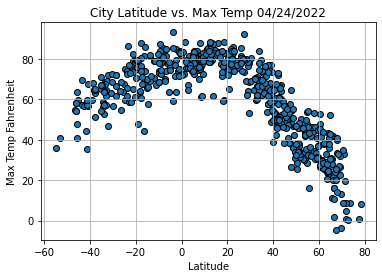

In [13]:
# Build a scatter plot
x_values=citydata_df["Latitude"]
y_values=citydata_df["Max Temp"]
plt.scatter(x_values,y_values, edgecolors="black")


# Name axis, title and set grid 
plt.title(f'City Latitude vs. Max Temp {time.strftime("%m/%d/%Y")}')
plt.ylabel("Max Temp Fahrenheit")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig(" Latitude vs. Max Temperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

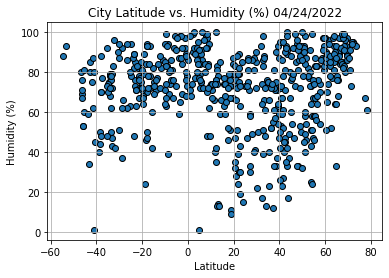

In [14]:
# Build a scatter plot
x_values=citydata_df["Latitude"]
y_values=citydata_df["Humidity"]
plt.scatter(x_values,y_values,edgecolors="black")


# Name axis, title and set grid 
plt.title(f'City Latitude vs. Humidity (%) {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig(" Latitude vs. Humidity (%).png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

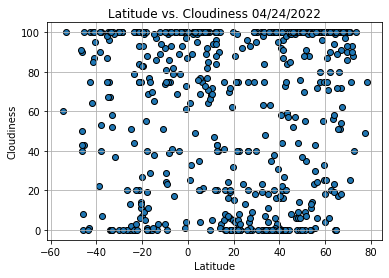

In [15]:
# Build a scatter plot
x_values=citydata_df["Latitude"]
y_values=citydata_df["Cloudiness"]
plt.scatter(x_values,y_values,edgecolors="black")


# Name axis, title and set grid 
plt.title(f'Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig(" Latitude vs. Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

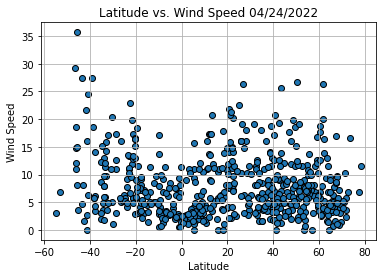

In [16]:
# Build a scatter plot
x_values=citydata_df["Latitude"]
y_values=citydata_df["Wind Speed"]
plt.scatter(x_values,y_values,edgecolors="black")


# Name axis, title and set grid 
plt.title(f'Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig(" Latitude vs. Wind Speed.png")

# Show plot
plt.show()

## Linear Regression

In [17]:
northern=citydata_df.loc[citydata_df["Latitude"] >= 0]
southern=citydata_df.loc[citydata_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
lin_reg=linregress(northern["Latitude"],northern["Max Temp"])
linear_equation=lin_reg[0]*northern["Latitude"]+lin_reg[1]
line_eq= f'y= {(round(lin_reg[0],2))}x + {str(round(lin_reg[1],2))}'
print(f'The r-value is: {round(lin_reg[2],3)}')
print(line_eq)

The r-value is: -0.892
y= -0.97x + 93.75


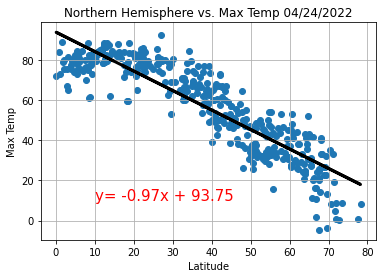

In [22]:
# Build a scatter plot
x_values=northern["Latitude"]
y_values=northern["Max Temp"]
plt.scatter(x_values,y_values)
plt.plot(northern["Latitude"],linear_equation,linewidth = 3,color = 'black')

# Name axis, title and set grid 
plt.title(f'Northern Hemisphere vs. Max Temp {time.strftime("%m/%d/%Y")}')
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(True)

# Save the figure
plt.savefig(" Northern Hemisphere vs. Max Temp .png")

# Show plot
plt.show()

In [23]:
lin_reg2=linregress(southern["Latitude"],southern["Max Temp"])
linear_equation2=lin_reg2[0]*southern["Latitude"]+lin_reg2[1]
line_eq2= f'y= {(round(lin_reg2[0],2))}x + {str(round(lin_reg2[1],2))}'
print(f'The r-value is: {round(lin_reg2[2],3)}')
print(line_eq2)

The r-value is: 0.693
y= 0.55x + 81.23


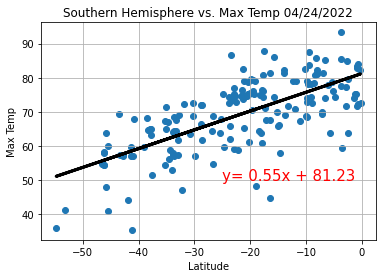

In [27]:
# Build a scatter plot
x_values_south=southern["Latitude"]
y_values_south=southern["Max Temp"]
plt.scatter(x_values_south,y_values_south)
plt.plot(southern["Latitude"],linear_equation2,linewidth = 3,color = 'black')


# Name axis, title and set grid 
plt.title(f'Southern Hemisphere vs. Max Temp {time.strftime("%m/%d/%Y")}')
plt.annotate(line_eq2,(-25,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(True)

# Save the figure
plt.savefig("Southern Hemisphere vs. Max Temp .png")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [29]:
# Calculate the correlation coefficient and linear regression model 
lin_reg3=linregress(northern["Latitude"],northern["Humidity"])
linear_equation3=lin_reg3[0]*northern["Latitude"]+lin_reg3[1]
line_eq3= f'y= {(round(lin_reg3[0],2))}x + {str(round(lin_reg3[1],2))}'
print(f'The r-value is: {round(lin_reg3[2],3)}')
print(line_eq3)

The r-value is: 0.167
y= 0.18x + 64.57


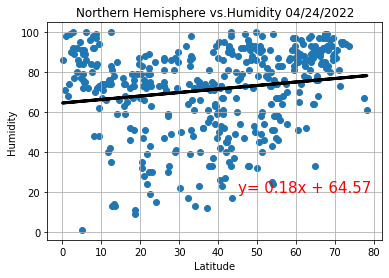

In [33]:
# Build a scatter plot
x_values3=northern["Latitude"]
y_values3=northern["Humidity"]
plt.scatter(x_values3,y_values3)
plt.plot(northern["Latitude"],linear_equation3,linewidth = 3,color = 'black')

# Name axis, title and set grid 
plt.title(f'Northern Hemisphere vs.Humidity {time.strftime("%m/%d/%Y")}')
plt.annotate(line_eq3,(45,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("Northern Hemisphere vs.Humidity.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [34]:
lin_reg4=linregress(southern["Latitude"],southern["Humidity"])
linear_equation4=lin_reg4[0]*southern["Latitude"]+lin_reg4[1]
line_eq4= f'y= {(round(lin_reg4[0],2))}x + {str(round(lin_reg4[1],2))}'
print(f'The r-value is: {round(lin_reg4[2],3)}')
print(line_eq4)

The r-value is: 0.306
y= 0.36x + 81.93


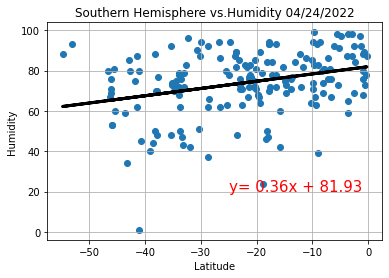

In [36]:
x_values4=southern["Latitude"]
y_values4=southern["Humidity"]
plt.scatter(x_values4,y_values4)
plt.plot(southern["Latitude"],linear_equation4,linewidth = 3,color = 'black')

# Name axis, title and set grid 
plt.title(f'Southern Hemisphere vs.Humidity {time.strftime("%m/%d/%Y")}')
plt.annotate(line_eq4,(-25,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("Southern Hemisphere vs.Humidity.png")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [37]:
# Calculate the correlation coefficient and linear regression model CLOYDINESS
lin_reg5=linregress(northern["Latitude"],northern["Cloudiness"])
linear_equation5=lin_reg5[0]*northern["Latitude"]+lin_reg5[1]
line_eq5= f'y= {(round(lin_reg5[0],2))}x + {str(round(lin_reg5[1],2))}'
print(f'The r-value is: {round(lin_reg5[2],3)}')
print(line_eq5)

The r-value is: 0.161
y= 0.32x + 45.53


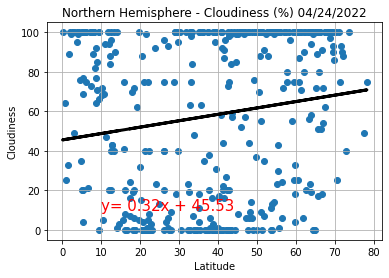

In [38]:
# Build a scatter plot
x_values5=northern["Latitude"]
y_values5=northern["Cloudiness"]
plt.scatter(x_values5,y_values5)
plt.plot(northern["Latitude"],linear_equation5,linewidth = 3,color = 'black')

# Name axis, title and set grid 
plt.title(f'Northern Hemisphere - Cloudiness (%) {time.strftime("%m/%d/%Y")}')
plt.annotate(line_eq5,(10,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
# Save the figure
plt.savefig("Northern Hemisphere - Cloudiness (%).png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [39]:
# Calculate the correlation coefficient and linear regression model CLOYDINESS
lin_reg6=linregress(southern["Latitude"],southern["Cloudiness"])
linear_equation6=lin_reg6[0]*southern["Latitude"]+lin_reg6[1]
line_eq6= f'y= {(round(lin_reg6[0],2))}x + {str(round(lin_reg6[1],2))}'
print(f'The r-value is: {round(lin_reg6[2],3)}')
print(line_eq6)

The r-value is: 0.071
y= 0.2x + 65.61


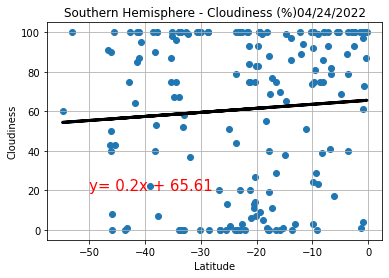

In [40]:
# Build a scatter plot
x_values6=southern["Latitude"]
y_values6=southern["Cloudiness"]
plt.scatter(x_values6,y_values6)
plt.plot(southern["Latitude"],linear_equation6,linewidth = 3,color = 'black')

# Name axis, title and set grid 
plt.title(f'Southern Hemisphere - Cloudiness (%){time.strftime("%m/%d/%Y")}')
plt.annotate(line_eq6,(-50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("Southern Hemisphere - Cloudiness (%).png")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [43]:
# Calculate the correlation coefficient and linear regression model CLOYDINESS
lin_reg7=linregress(northern["Latitude"],northern["Wind Speed"])
linear_equation7=lin_reg7[0]*northern["Latitude"]+lin_reg7[1]
line_eq7= f'y= {(round(lin_reg7[0],2))}x + {str(round(lin_reg7[1],2))}'
print(f'The r-value is: {round(lin_reg7[2],3)}')
print(line_eq7)

The r-value is: -0.004
y= -0.0x + 7.67


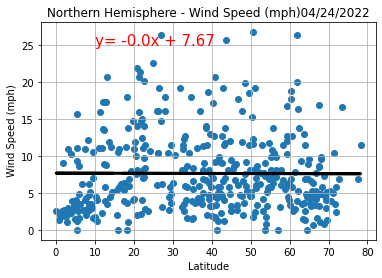

In [47]:
x_values7=northern["Latitude"]
y_values7=northern["Wind Speed"]
plt.scatter(x_values7,y_values7)
plt.plot(northern["Latitude"],linear_equation7,linewidth = 3,color = 'black')

# Name axis, title and set grid 
plt.title(f'Northern Hemisphere - Wind Speed (mph){time.strftime("%m/%d/%Y")}')
plt.annotate(line_eq7,(10,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel(" Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("Northern Hemisphere - Wind Speed (mph).png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [48]:
# Calculate the correlation coefficient and linear regression model CLOYDINESS
lin_reg8=linregress(southern["Latitude"],southern["Wind Speed"])
linear_equation8=lin_reg8[0]*southern["Latitude"]+lin_reg8[1]
line_eq8= f'y= {(round(lin_reg8[0],2))}x + {str(round(lin_reg8[1],2))}'
print(f'The r-value is: {round(lin_reg8[2],3)}')
print(line_eq8)

The r-value is: -0.384
y= -0.17x + 4.47


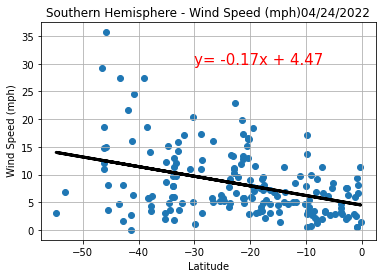

In [51]:
x_values8=southern["Latitude"]
y_values8=southern["Wind Speed"]
plt.scatter(x_values8,y_values8)
plt.plot(southern["Latitude"],linear_equation8,linewidth = 3,color = 'black')

# Name axis, title and set grid 
plt.title(f'Southern Hemisphere - Wind Speed (mph){time.strftime("%m/%d/%Y")}')
plt.annotate(line_eq8,(-30,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel(" Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("Southern Hemisphere - Wind Speed (mph).png")
